<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all we'll import all the necessary packages that will be used for this assignmebt and also we'll import our csv file into this

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:
##read tabular data
## first create the data frame "df" with given data 
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
## df.head(n) prints the first n rows 
## this printing of data frame help use to understand what type of the data we have in our data file ....
df.head(15) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Now we'll check data types of each column and see how many rows and columns are there in out data frame also non empty rows corresponding to each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Now we'll we'll just take some basic ideas of each int type column of our data frame using .describe() function of pandas

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Visualisation And Data Pre Processing

#Removing Irrelevant Columns

In [ ]:
df=df.drop(['Loan_ID','Dependents'],axis=1)
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,0.070489,0.000000,NaN,0.74359,1.0,Urban,Y
1,Male,Yes,Graduate,No,0.054830,0.036192,0.172214,0.74359,1.0,Rural,N
2,Male,Yes,Graduate,Yes,0.035250,0.000000,0.082489,0.74359,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,0.030093,0.056592,0.160637,0.74359,1.0,Urban,Y
4,Male,No,Graduate,No,0.072356,0.000000,0.191027,0.74359,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,0.065145,0.100703,0.373372,0.74359,1.0,Urban,Y
6,Male,Yes,Not Graduate,No,0.027001,0.036384,0.124457,0.74359,1.0,Urban,Y
7,Male,Yes,Graduate,No,0.035696,0.060096,0.215630,0.74359,0.0,Semiurban,N
8,Male,Yes,Graduate,No,0.047693,0.036624,0.230101,0.74359,1.0,Urban,Y
9,Male,Yes,Graduate,No,0.156970,0.263230,0.492041,0.74359,1.0,Semiurban,N


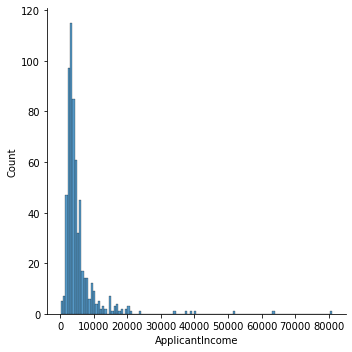

In [ ]:
sns.displot(df['ApplicantIncome'])

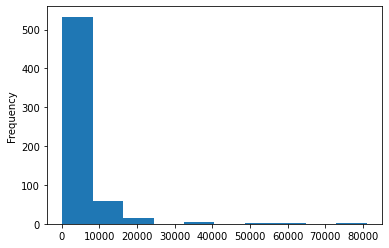

In [ ]:
df.ApplicantIncome.plot.hist()

As we can see from the distplot and histogram the ApplicantIncome column has some outliers in it also the distribution is skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


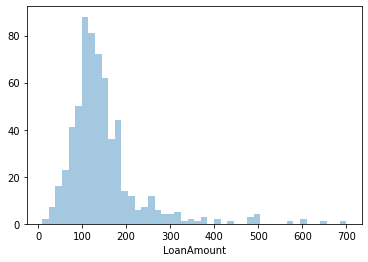

In [ ]:
sns.distplot(df.LoanAmount.dropna (),kde=False)

#The Loan amount forms a normal distplot and has some outliars in it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


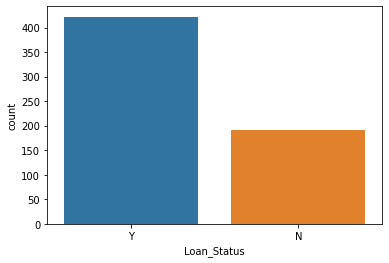

In [ ]:
sns.countplot(df['Loan_Status'])

#We can see that more than 400 loans are approved

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    float64
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


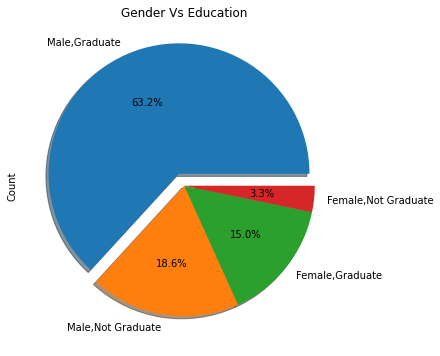

**This pie chart shows that male graduates are more likely to apply for a loan compared to the other groups of people.**

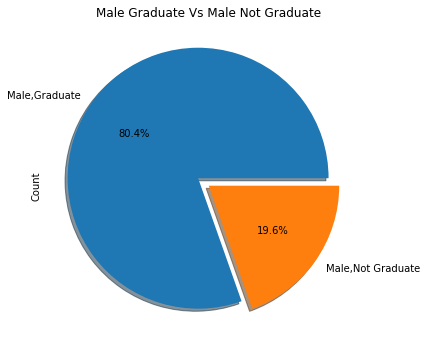

In [ ]:
mgy=df[(df['Education']=='Graduate') & (df['Gender']=='Male') & (df['Loan_Status']=='Y')]
mngy=df[(df['Education']=='Not Graduate') & (df['Gender']=='Male') & (df['Loan_Status']=='Y')]
df2=pd.DataFrame({'Categories': ['Male,Graduate','Male,Not Graduate'],'Count': [mgy.shape[0],mngy.shape[0]]})
df2.plot.pie(y='Count',figsize=(6,6), title="Male Graduate Vs Male Not Graduate", legend=False,autopct='%1.1f%%', labels=df2.Categories, explode=(0.1, 0),shadow=True, startangle=0)

**This pie chart showing the probability of males being approved for house loans based on education.Among Males, Male Graduates are more likely to get a house loan with a probability of 0.804.**

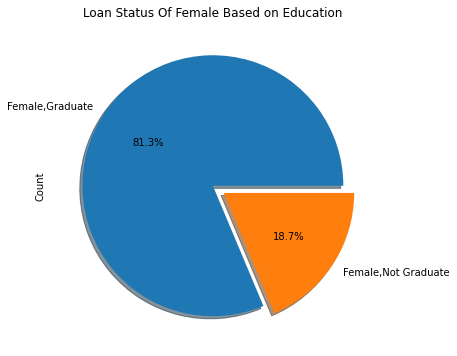

In [ ]:
fmgy=df[(df['Education']=='Graduate') & (df['Gender']=='Female') & (df['Loan_Status']=='Y')]
fmngy=df[(df['Education']=='Not Graduate') & (df['Gender']=='Female') & (df['Loan_Status']=='Y')]
df2=pd.DataFrame({'Categories': ['Female,Graduate','Female,Not Graduate'],'Count': [fmgy.shape[0],fmngy.shape[0]]})
df2.plot.pie(y='Count',figsize=(6,6), title="Loan Status Of Female Based on Education", legend=False,autopct='%1.1f%%', labels=df2.Categories, explode=(0,0.1),shadow=True, startangle=0)

**This pie chart showing the probability of females being approved for house loans based on education.Among Female, Female Graduates are more likely to get a house loan with a probability of 0.813.**


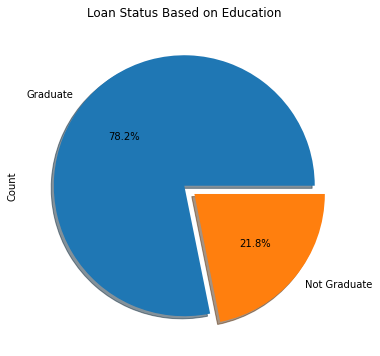

In [ ]:
abi=df[(df['Education']=='Graduate')]
abin=df[(df['Education']=='Not Graduate')]
df2=pd.DataFrame({'Categories': ['Graduate','Not Graduate'],'Count': [abi.shape[0],abin.shape[0]]})
df2.plot.pie(y='Count',figsize=(6,6), title="Loan Status Based on Education", legend=False,autopct='%1.1f%%', labels=df2.Categories, explode=(0,0.1),shadow=True, startangle=0)

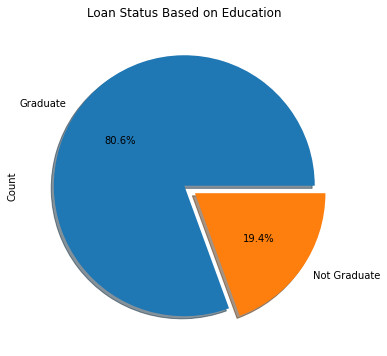

In [ ]:
abi=df[(df['Education']=='Graduate') & (df['Loan_Status']=='Y')]
abin=df[(df['Education']=='Not Graduate') & (df['Loan_Status']=='Y')]
df2=pd.DataFrame({'Categories': ['Graduate','Not Graduate'],'Count': [abi.shape[0],abin.shape[0]]})
df2.plot.pie(y='Count',figsize=(6,6), title="Loan Status Based on Education", legend=False,autopct='%1.1f%%', labels=df2.Categories, explode=(0,0.1),shadow=True, startangle=0)

**A pie chart showing the probability of people being approved for house loans based on education.**
**Graduates are more likely to get a house loan with a probability of 0.806.**

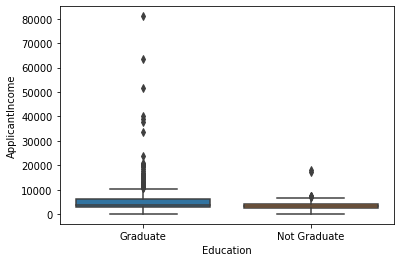

In [ ]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

**From the above box plot we can notice that the graduates have more outliers which means that the people with large income are mostly well educated.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


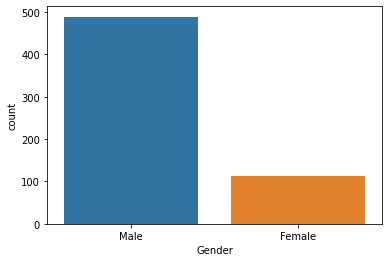

In [ ]:
sns.countplot(df['Gender'])

#Mostly Loan Applicants are Male only

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


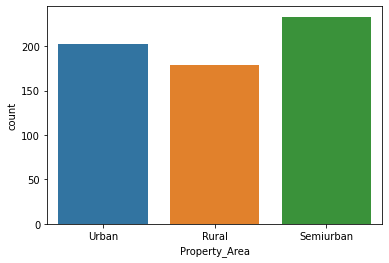

In [ ]:
sns.countplot(df['Property_Area'])

#we can see that distribution of Loan Applicants from urban, semi-urban and rural

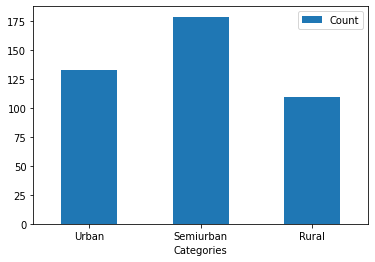

In [ ]:
urb=df[(df['Property_Area']=='Urban') & (df['Loan_Status']=='Y')]
semurb=df[(df['Property_Area']=='Semiurban') & (df['Loan_Status']=='Y')]
rur=df[(df['Property_Area']=='Rural') & (df['Loan_Status']=='Y')]
df21=pd.DataFrame({'Categories': ['Urban','Semiurban','Rural'],'Count': [urb.shape[0],semurb.shape[0],rur.shape[0]]})
df21.plot.bar(x='Categories',y='Count',rot=0)

**A bar plot depicting the number of approved applicants from each property area**

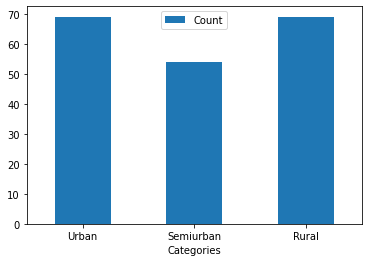

In [ ]:
urbn=df[(df['Property_Area']=='Urban') & (df['Loan_Status']=='N')]
semurbn=df[(df['Property_Area']=='Semiurban') & (df['Loan_Status']=='N')]
rurn=df[(df['Property_Area']=='Rural') & (df['Loan_Status']=='N')]
df212=pd.DataFrame({'Categories': ['Urban','Semiurban','Rural'],'Count': [urbn.shape[0],semurbn.shape[0],rurn.shape[0]]})
df212.plot.bar(x='Categories',y='Count',rot=0)


**A bar plot depicting the number of disapproved applicants from each property area**

In [ ]:
print("Urban Approval Ratio =",(urb.shape[0])/(urb.shape[0]+urbn.shape[0]))
print("Semiurban Approval Ratio =",(semurb.shape[0])/(semurb.shape[0]+semurbn.shape[0]))
print("Rural Approval Ratio =",(rur.shape[0])/(rur.shape[0]+rurn.shape[0]))

Urban Approval Ratio = 0.6584158415841584
Semiurban Approval Ratio = 0.7682403433476395
Rural Approval Ratio = 0.6145251396648045


In [ ]:
from sklearn import preprocessing
lvl=preprocessing.LabelEncoder()
lvlEnc= lvl.fit_transform(df["Loan_Status"])
dfnew=df.drop("Loan_Status",axis="columns")
dfnew["Loan_Status"]=lvlEnc
dfnew.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64

##Above what we have done is , we have converted the Loan Status to Numerical Data and then we have compared between Credit History and Loan Status and we came to a result that People with a credit history a way more likely to pay their loan, 0.07 vs 0.79. A value close to 1 indicates a high loan success rate.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


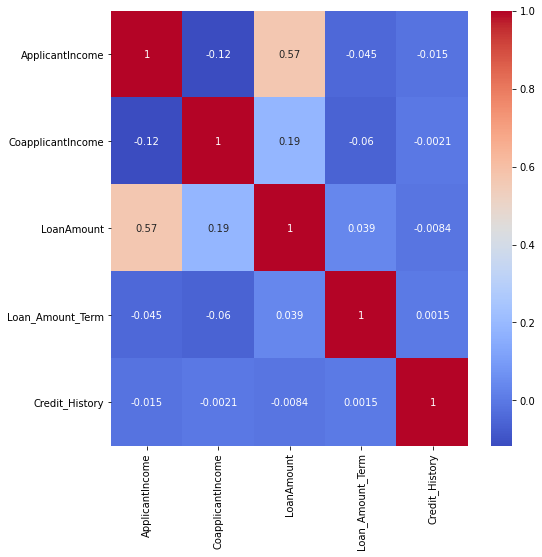

In [ ]:
coorelation_matrix=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(coorelation_matrix,annot=True,cmap='coolwarm')
coorelation_matrix

#Co-relation Matrix Of all Numerical Columns

#Normalisation of Data
As we know that our data set have 
 *    ApplicantIncome    
 *    CoapplicantIncome  
 *   LoanAmount          
 *   Loan_Amount_Term    
 *  Credit_History    

 these columns are only of numerical type so we'll normalise these columns

In [ ]:
Normalised_Data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]
Normalised_Data=Normalised_Data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]=Normalised_Data
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,0.070489,0.000000,0.198860,0.74359,1.0,Urban,Y
1,Male,Yes,Graduate,No,0.054830,0.036192,0.172214,0.74359,1.0,Rural,N
2,Male,Yes,Graduate,Yes,0.035250,0.000000,0.082489,0.74359,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,0.030093,0.056592,0.160637,0.74359,1.0,Urban,Y
4,Male,No,Graduate,No,0.072356,0.000000,0.191027,0.74359,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,0.065145,0.100703,0.373372,0.74359,1.0,Urban,Y
6,Male,Yes,Not Graduate,No,0.027001,0.036384,0.124457,0.74359,1.0,Urban,Y
7,Male,Yes,Graduate,No,0.035696,0.060096,0.215630,0.74359,0.0,Semiurban,N
8,Male,Yes,Graduate,No,0.047693,0.036624,0.230101,0.74359,1.0,Urban,Y
9,Male,Yes,Graduate,No,0.156970,0.263230,0.492041,0.74359,1.0,Semiurban,N


#Now we can see that after normalisation All the data in the numerical Columns are in the range of 0-1. So our data frame is normalised.

**Thank You**